# OLD NOTEBOOK!!! Ensemble Evaluation: Timepoint 2 - Summer 2021

Location: New York State

Timepoint 2: July 15, 2021. Setting: New York State upon the arrival of the Delta variant. Vaccines available.

## Set up for ensemble modeling

### Load dependencies

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyciemss.Ensemble.interfaces import (
    load_and_sample_petri_ensemble, load_and_calibrate_and_sample_ensemble_model
)
from pyciemss.PetriNetODE.interfaces import (
    load_and_sample_petri_model,
    load_and_calibrate_and_sample_petri_model,
    load_and_optimize_and_sample_petri_model,
    load_and_calibrate_and_optimize_and_sample_petri_model
)
from pyciemss.visuals import plots
from pyciemss.utils import get_tspan
from pyciemss.utils.interface_utils import cdc_reformatcsv

### Collect relevant models

In [2]:
# model1_location = "../../notebook/ensemble_eval_sa/operative_models/age_vacc_var_V1.json"
model2_location = "../../notebook/ensemble_eval_sa/operative_models/age_vacc_var_v2.json"
# model3_location = "../../notebook/ensemble_eval_sa/operative_models/age_vacc_var_reinfection_v1.json"
model4_location = "../../notebook/ensemble_eval_sa/operative_models/age_vacc_var_reinfection_v2.json"
model5_location = "../../notebook/ensemble_eval_sa/operative_models/age_vacc_var_reinfection_v3.json"

## Get data

### Define a function to process the source data and produce the necessary datasets for plotting and calibration

In [3]:
def data_selector_function(data_df, train_start_row_num, train_end_row_num, forecast_end_row_num):
    '''
    This function produces three datasets: all_data, all_data1, train_data.
    '''
    all_data = data_df[train_start_row_num:forecast_end_row_num].reset_index()
    all_data = all_data.drop(columns="timestep")
    all_data = all_data.drop(columns="index")

    all_data1 = data_df[train_end_row_num:forecast_end_row_num].reset_index()
    all_data1 = all_data1.drop(columns="timestep")
    all_data1 = all_data1.drop(columns="index")

    train_data = data_df[train_start_row_num:train_end_row_num].reset_index(drop=True)
    train_data1 = train_data.assign(timepoints=[float(i) for i in range(len(train_data))])
    train_data = train_data1[["timepoints", "I", "H", "D"]]

    num_timepoints = (len(train_data) + len(all_data1))*10 + 1
    simulation_timepoints = list(get_tspan(0, (len(train_data) + len(all_data1)), num_timepoints).detach().numpy())
    
    return all_data, all_data1, train_data, simulation_timepoints

### Gather source data and set `DATA_PATH`, `RESULTS_PATH`

In [20]:
url = 'https://raw.githubusercontent.com/DARPA-ASKEM/experiments/main/thin-thread-examples/milestone_12month/evaluation/ensemble_eval_SA/datasets/aabb3684-a7ea-4f60-98f1-a8e673ad6df5/dataset.csv'
nys_data = pd.read_csv(url)
DATA_PATH = "../../notebook/ensemble_eval_sa/datasets/"
RESULTS_PATH = "../../notebook/ensemble_eval_sa/ensemble_results/"

### Create and save datasets and simulation timepoints for each forecast

In [5]:
### Forecast 1: 07/15/2021 - 08/12/2021, data: 05/01/2021 - 08/11/2021

# Forecast 1: 07/15/2021 (day 75, row 541) - 08/12/2021 (day 103, row 569), train data: 05/01/2021 (day 0, row 466) - 07/14/2021 (day 74, row 540)
[all_data1, all_data11, train_data1, timepoints1] = data_selector_function(nys_data, 465, 540, 569)
train_data1[["I", "H", "D"]].to_csv(DATA_PATH + "NYS_T2_forecast1.csv")

### Forecast 2: 07/22/2021 - 08/19/2021, data: 05/01/2021 - 07/21/2021

# Forecast 2: 07/22/2021 (day 82, row 548) - 08/19/2021 (day 110, row 576), train data: 05/01/2021 (day 0, row 466) - 07/21/2021 (day 81, row 547)
[all_data2, all_data12, train_data2, timepoints2] = data_selector_function(nys_data, 465, 547, 576)
train_data2[["I", "H", "D"]].to_csv(DATA_PATH + "NYS_T2_forecast2.csv")

### Forecast 3: 07/29/2021 - 08/26/2021, data: 05/01/2021 - 07/28/2021

# Forecast 3: 07/29/2021 (day 89, row 555) - 08/26/2021 (day 117, row 583), train data: 05/01/2021 (day 0, row 466) - 07/28/2021 (day 88, row 554)
[all_data3, all_data13, train_data3, timepoints3] = data_selector_function(nys_data, 465, 554, 583)
train_data3[["I", "H", "D"]].to_csv(DATA_PATH + "NYS_T2_forecast3.csv")

### Forecast 4: 08/05/2021 - 09/02/2021, data: 05/01/2021 - 08/04/2021

# Forecast 3: 08/05/2021 (day 96, row 562) - 09/02/2021 (day 124, row 590), train data: 05/01/2021 (day 0, row 466) - 08/04/2021 (day 95, row 561)
[all_data4, all_data14, train_data4, timepoints4] = data_selector_function(nys_data, 465, 561, 590)
train_data4[["I", "H", "D"]].to_csv(DATA_PATH + "NYS_T2_forecast4.csv")

### Plot the data

Text(0.5, 1.0, 'Cumulative Deaths per 100,000')

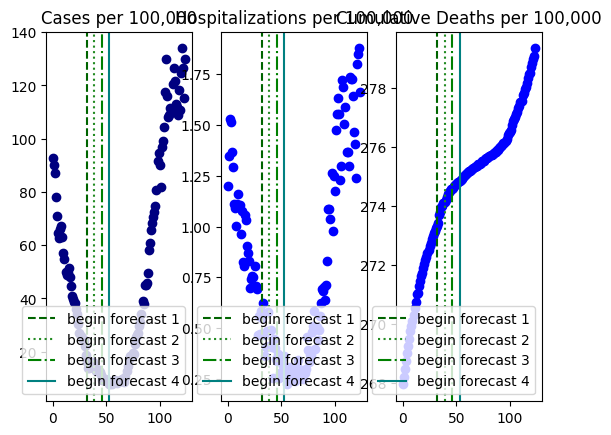

In [8]:
N = 19_340_000

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# ax1.scatter(all_data4.index, all_data4.I, color="navy")
ax1.scatter(all_data4.index, 100000*(all_data4.I/N), color="navy")
ax1.axvline(x = 32, color = 'darkgreen', linestyle ="--", label = 'begin forecast 1')
ax1.axvline(x = 39, color = 'forestgreen', linestyle =":", label = 'begin forecast 2')
ax1.axvline(x = 46, color = 'green', linestyle ="-.", label = 'begin forecast 3')
ax1.axvline(x = 53, color = 'teal', label = 'begin forecast 4')
ax1.legend(loc='lower right')
# ax1.set_title("Cases")
ax1.set_title("Cases per 100,000")

# ax2.scatter(all_data4.index, all_data4.H, color="blue")
ax2.scatter(all_data4.index, 100000*(all_data4.H/N), color="blue")
ax2.axvline(x = 32, color = 'darkgreen', linestyle ="--", label = 'begin forecast 1')
ax2.axvline(x = 39, color = 'forestgreen', linestyle =":", label = 'begin forecast 2')
ax2.axvline(x = 46, color = 'green', linestyle ="-.", label = 'begin forecast 3')
ax2.axvline(x = 53, color = 'teal', label = 'begin forecast 4')
ax2.legend(loc='lower right')
# ax2.set_title("Hospitalizations")
ax2.set_title("Hospitalizations per 100,000")

# ax3.scatter(all_data4.index, all_data4.D, color="blue")
ax3.scatter(all_data4.index, 100000*(all_data4.D/N), color="blue")
ax3.axvline(x = 32, color = 'darkgreen', linestyle ="--", label = 'begin forecast 1')
ax3.axvline(x = 39, color = 'forestgreen', linestyle =":", label = 'begin forecast 2')
ax3.axvline(x = 46, color = 'green', linestyle ="-.", label = 'begin forecast 3')
ax3.axvline(x = 53, color = 'teal', label = 'begin forecast 4')
ax3.legend(loc='lower right')
# ax3.set_title("Cumulative Deaths")
ax3.set_title("Cumulative Deaths per 100,000")

## Load, calibrate and sample an ensemble of one model

In [13]:
num_samples = 100
models = [model2_location]
data_location = DATA_PATH + "NYS_T2_forecast1.csv"
weights = [1]
solution_mappings = [{"I": "infected", "H": "hospitalized", "D": "dead"}] # "column name in data": "observable or state variable in model"
# solution_mappings = [{"I": "I", "H": "H", "D": "D"}]

# Run the calibration and sampling
result = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints1,
    total_population=19340000,
    num_iterations=26,
    verbose=True,
    method="euler",
    time_unit="days",
    # visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

iteration 0: loss = 4402.996428191662
iteration 25: loss = 2800.6388588547707


In [14]:
# Save results
# result["data"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_results_day0_Jun032021.csv", index=False)
# result["quantiles"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_quantiles_day0_Jun032021.csv", index=False)

# q_ensemble_data = cdc_reformatcsv(filename="../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_quantiles_day0_Jun032021.csv", 
#                                   solution_string_mapping={"I": "cases", "H": "hospitalizations", "D": "deaths"}, 
#                                   forecast_start_date="2021-07-14",
#                                   location="New York State",
#                                   drop_column_names=["timepoint_id", "number_days", "inc_cum", "output", "Forecast_Backcast"])
# q_ensemble_data.to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_forecast_quantiles_Jul152021.csv")

# Plot results
schema = plots.trajectories(pd.DataFrame(result["data"]), keep=".*_sol",
                            points=all_data1.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
# plots.ipy_display(schema)

plots.save_schema(schema, "_schema.json")
plots.ipy_display(schema)

In [17]:
num_samples = 100
models = [model4_location]
data_location = DATA_PATH + "NYS_T2_forecast1.csv"
weights = [1]
solution_mappings = [{"I": "infected", "H": "hospitalized", "D": "dead"}] # "column name in data": "observable or state variable in model"

# Run the calibration and sampling
result1 = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints1,
    verbose=True,
    total_population=19340000,
    num_iterations=150,
    method="euler",
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# # # Save results
# result1["data"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_results.csv", index=False)
# result1["quantiles"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_quantiles.csv", index=False)

# q_ensemble_data = cdc_reformatcsv(filename="../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_quantiles.csv", 
#                                   solution_string_mapping={"I": "cases", "H": "hospitalizations", "D": "deaths"}, 
#                                   forecast_start_date="2021-07-14",
#                                   location="New York State",
#                                   drop_column_names=["timepoint_id", "number_days", "inc_cum", "output", "Forecast_Backcast"])
# q_ensemble_data.to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_forecast_quantiles_Jul152021.csv")

# Plot results
schema = plots.trajectories(pd.DataFrame(result1["data"]), keep=".*_sol",
                            points=all_data1.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.ipy_display(schema)

iteration 0: loss = 3852.6614530682564
iteration 25: loss = 2441.3903245329857
iteration 50: loss = 2345.1940633654594
iteration 75: loss = 2323.991259753704
iteration 100: loss = 2314.272309601307
iteration 125: loss = 2313.158057630062



In [18]:
num_samples = 100
models = [model5_location]
data_location = DATA_PATH + "NYS_T2_forecast1.csv"
weights = [1]
solution_mappings = [{"I": "infected", "H": "hospitalized", "D": "dead"}] # "column name in data": "observable or state variable in model"

# Run the calibration and sampling
result2 = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints1,
    verbose=True,
    total_population=19340000,
    num_iterations=26,
    method="euler",
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# # Save results
# result2["data"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_results_day0_Jun032021.csv", index=False)
# result2["quantiles"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_one_quantiles_day0_Jun032021.csv", index=False)

# Plot results
schema = plots.trajectories(pd.DataFrame(result2["data"]), keep=".*_sol",
                            points=all_data1.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.ipy_display(schema)

iteration 0: loss = 3521.082009971142
iteration 25: loss = 2381.4068469405174



## Load, calibrate and sample an ensemble of several models

In [19]:
num_samples = 2
models = [model2_location, model4_location, model5_location]
data_location = DATA_PATH + "NYS_T2_forecast1.csv"
weights = [0.1, 0.4, 0.5] # [1/len(models) for i in models]
solution_mappings = [{"I": "infected", "H": "hospitalized", "D": "dead"},
                     {"I": "infected", "H": "hospitalized", "D": "dead"}, 
                     {"I": "infected", "H": "hospitalized", "D": "dead"},
                     ]

# Run the calibration and sampling
result3 = load_and_calibrate_and_sample_ensemble_model(
    models,
    data_location,
    weights,
    solution_mappings,
    num_samples,
    timepoints1,
    verbose=True,
    total_population=19340000,
    num_iterations=200,
    method="euler",
    time_unit="days",
    visual_options={"title": "Calibrated Ensemble", "keep":".*_sol"}
)

# Save results
# result3["data"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_many_results_day0_Jun032021.csv", index=False)
# result3["quantiles"].to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_many_quantiles_day0_Jun032021.csv", index=False)

# Plot results
schema = plots.trajectories(pd.DataFrame(result3["data"]), keep=".*_sol",
                            points=all_data1.reset_index(drop=True).rename(columns={"I":"I_data", "H":"H_data", "D":"D_data"}),
                           )
schema = plots.pad(schema, 5)
plots.ipy_display(schema)

iteration 0: loss = 4855.394368350506
iteration 25: loss = 3100.9197987914085
iteration 50: loss = 2447.2337870001793
iteration 75: loss = 2414.368208229542
iteration 100: loss = 2375.040163218975
iteration 125: loss = 2364.5538257956505
iteration 150: loss = 2336.3364322781563
iteration 175: loss = 2332.4022062420845



In [ ]:
# q_ensemble_data = cdc_reformatcsv(filename="../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_many_quantiles_day0_Jun032021.csv", 
#                                   solution_string_mapping={"I": "cases", "H": "hospitalizations", "D": "deaths"}, 
#                                   forecast_start_date="2021-07-14",
#                                   location="New York State",
#                                   drop_column_names=["timepoint_id", "number_days", "inc_cum", "output", "Forecast_Backcast"])
# q_ensemble_data.to_csv("../../notebook/ensemble_eval_sa/ensemble_results/partII_ensemble_of_many_forecast_quantiles_Jul152021.csv")